In [1]:
import pandas as pd
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal, fftpack
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import hilbert, chirp, find_peaks

df1 = pd.read_csv('tulang_a.csv')

x1 = df1['x']
y1 = df1['y']

In [2]:
df1.head

<bound method NDFrame.head of                 x         y
0        5.000000 -0.046875
1        5.015625 -0.050781
2        5.031250 -0.046875
3        5.046875 -0.039062
4        5.062500 -0.042969
...           ...       ...
10994  176.781250 -0.031250
10995  176.796875 -0.027344
10996  176.812500 -0.007812
10997  176.828125 -0.015625
10998  176.843750  0.000000

[10999 rows x 2 columns]>

Text(0.5, 1.0, 'Tulang A')

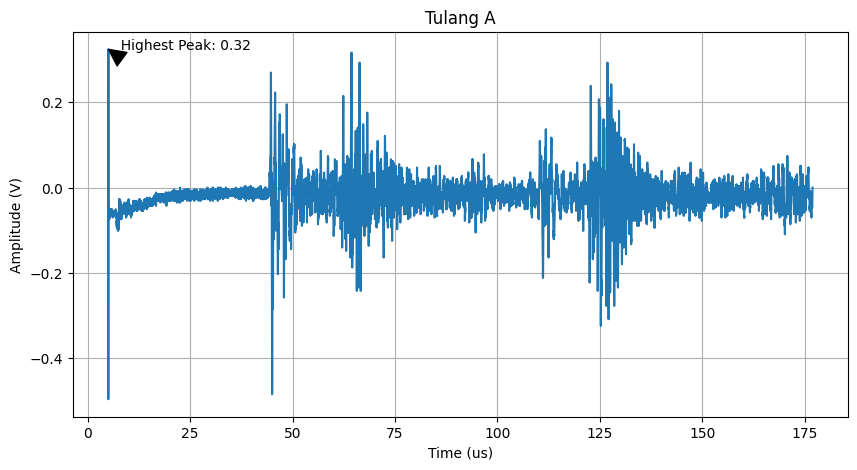

In [3]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[y1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, y1)
plt.annotate(f'  Highest Peak: {y1[highest_peak]:.2f}', 
             xy=(x1[highest_peak], 
                 y1[highest_peak]),
             xytext=(x1[highest_peak]+1, y1[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang A')

In [4]:
# Extract data from specific columns
time1 = df1['x'].to_numpy()
signal_data1 = df1['y'].to_numpy()

# Define the filter parameters
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
filtered_signal1 = signal.filtfilt(b, a, signal_data1)

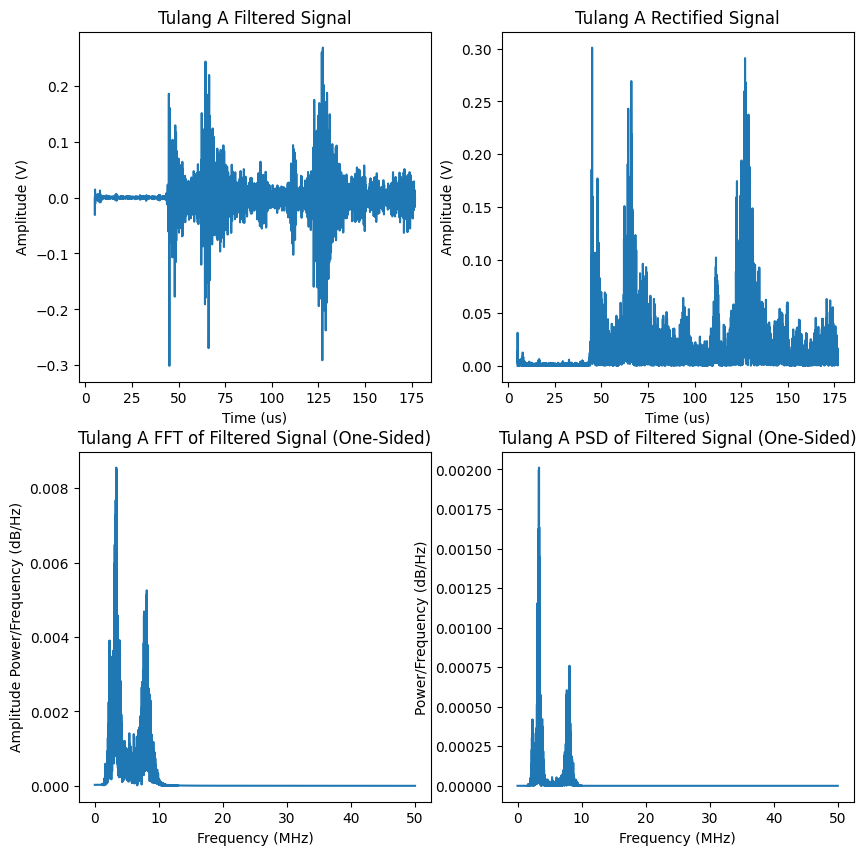

In [5]:
# Rectify the signal (take only the positive values)
rectified_signal1 = np.abs(filtered_signal1)

# Perform Fourier transform
signal_fft1 = np.fft.fft(filtered_signal1)
signal_freq1 = np.fft.fftfreq(len(filtered_signal1), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
n = len(filtered_signal1)
freq1 = signal_freq1[0:int(n/2)]
fft_amp1 = np.abs(signal_fft1)[0:int(n/2)]/n*2

# Perform power spectral density (PSD) calculation
psd1 = (1/(fs*n)) * np.square(np.abs(signal_fft1[:n//2]))

# Perform one-sided PSD (discard negative frequencies)
freq_psd1 = signal_freq1[0:int(n/2)]
psd_one_sided1 = psd1[0:int(n/2)]

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time1, filtered_signal1)
axs[0, 0].set_title('Tulang A Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(time1, rectified_signal1)
axs[0, 1].set_title('Tulang A Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq1, fft_amp1)
axs[1, 0].set_title('Tulang A FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd1, psd_one_sided1)
axs[1, 1].set_title('Tulang A PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

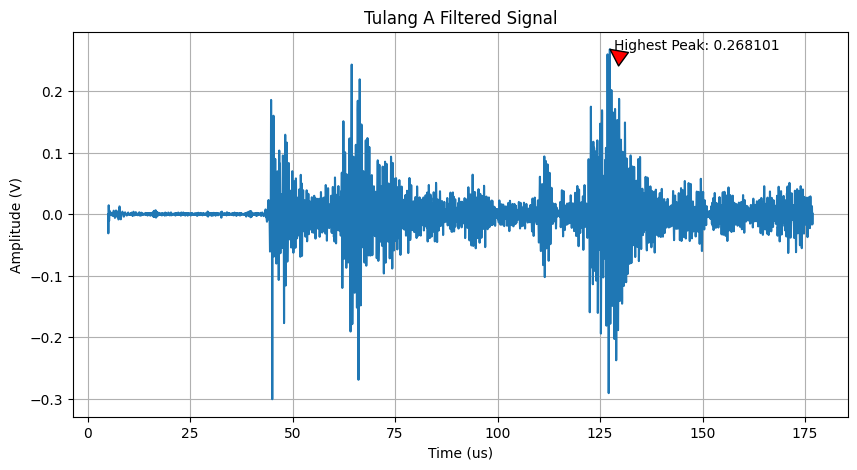

In [6]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time1, filtered_signal1)
plt.annotate(f'Highest Peak: {filtered_signal1[highest_peak]:.6f}', 
             xy=(time1[highest_peak], 
                 filtered_signal1[highest_peak]),
             xytext=(time1[highest_peak]+1, filtered_signal1[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Tulang A Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

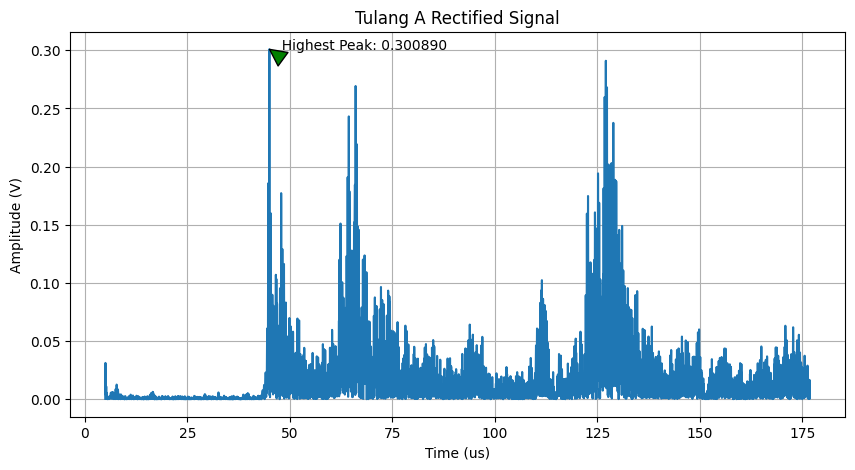

In [7]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time1, rectified_signal1)
plt.annotate(f'  Highest Peak: {rectified_signal1[highest_peak]:.6f}', 
             xy=(time1[highest_peak], 
                 rectified_signal1[highest_peak]),
             xytext=(time1[highest_peak]+1, rectified_signal1[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('Tulang A Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

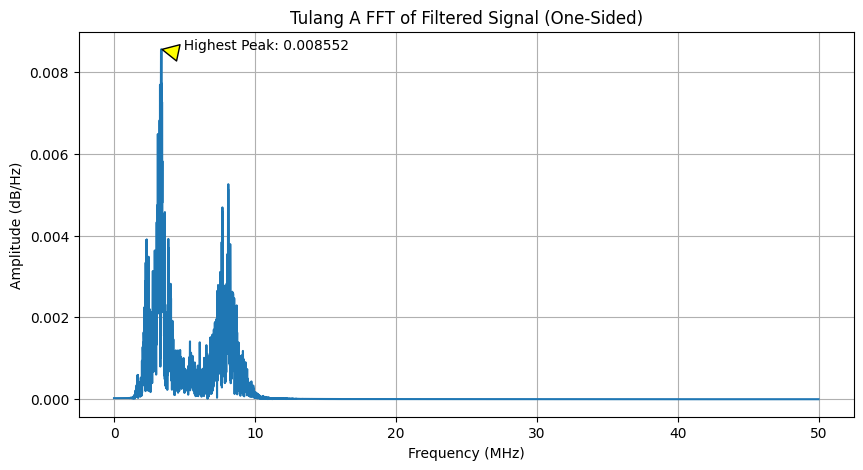

In [8]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq1, fft_amp1)
plt.annotate(f'  Highest Peak: {fft_amp1[highest_peak]:.6f}', 
             xy=(freq1[highest_peak], 
                 fft_amp1[highest_peak]),
             xytext=(freq1[highest_peak]+1, fft_amp1[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.title('Tulang A FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

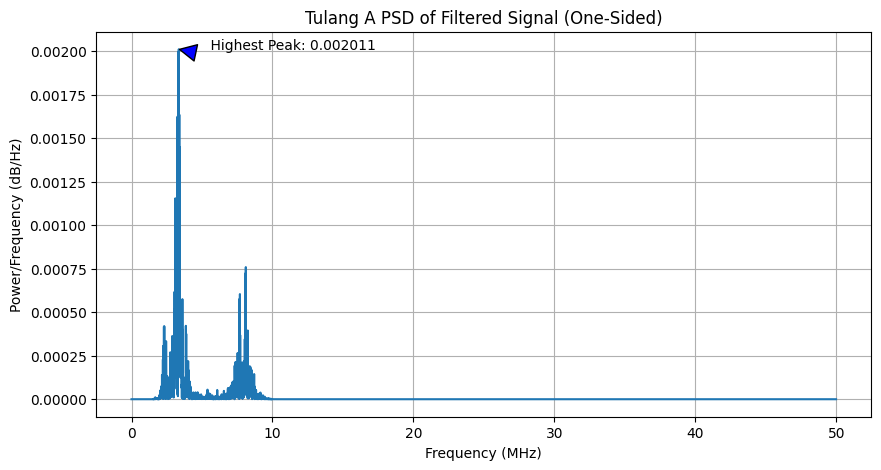

In [9]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(psd_one_sided1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd1, psd_one_sided1)
plt.annotate(f'    Highest Peak: {psd_one_sided1[highest_peak]:.6f}', 
             xy=(freq_psd1[highest_peak], 
                 psd_one_sided1[highest_peak]),
             xytext=(freq_psd1[highest_peak]+1, psd_one_sided1[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('Tulang A PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')